In [35]:
import pandas as pd

In [36]:
DATA_PATH="/Users/ajay.pundhir/Downloads"

In [37]:
data = pd.read_csv(DATA_PATH+"/CCPP_data.csv")

In [38]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


The columns in the data consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

In [40]:
data.AT.min(), data.AT.max()

(1.81, 37.11)

In [41]:
data.AP.min(), data.AP.max()

(992.89, 1033.3)

In [42]:
data.RH.min(), data.RH.max()

(25.56, 100.16)

In [43]:
data.V.min(), data.V.max()

(25.36, 81.56)

In [44]:
data.PE.min(), data.PE.max()

(420.26, 495.76)

## EDA

In [45]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

/Users/ajay.pundhir/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

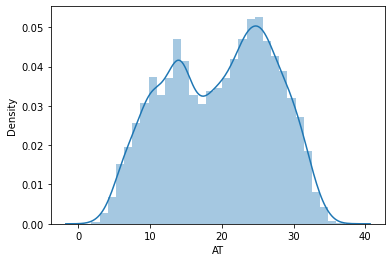

In [46]:
sns.distplot(data.AT)

/Users/ajay.pundhir/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP', ylabel='Density'>

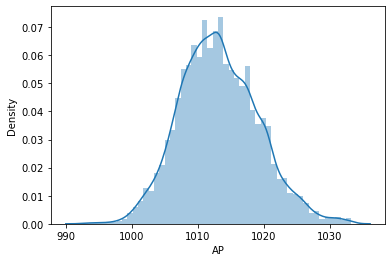

In [47]:
sns.distplot(data.AP)

/Users/ajay.pundhir/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RH', ylabel='Density'>

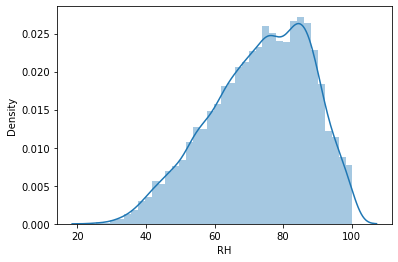

In [48]:
sns.distplot(data.RH)

/Users/ajay.pundhir/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V', ylabel='Density'>

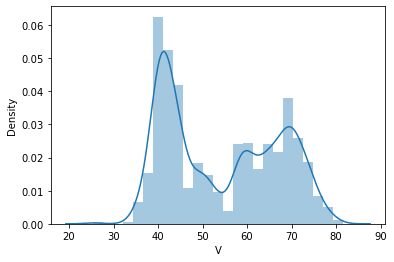

In [49]:
sns.distplot(data.V)

In [50]:
corr = data.corr()

In [51]:
corr

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


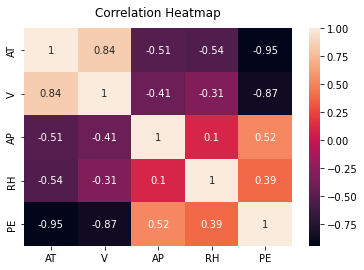

In [52]:
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

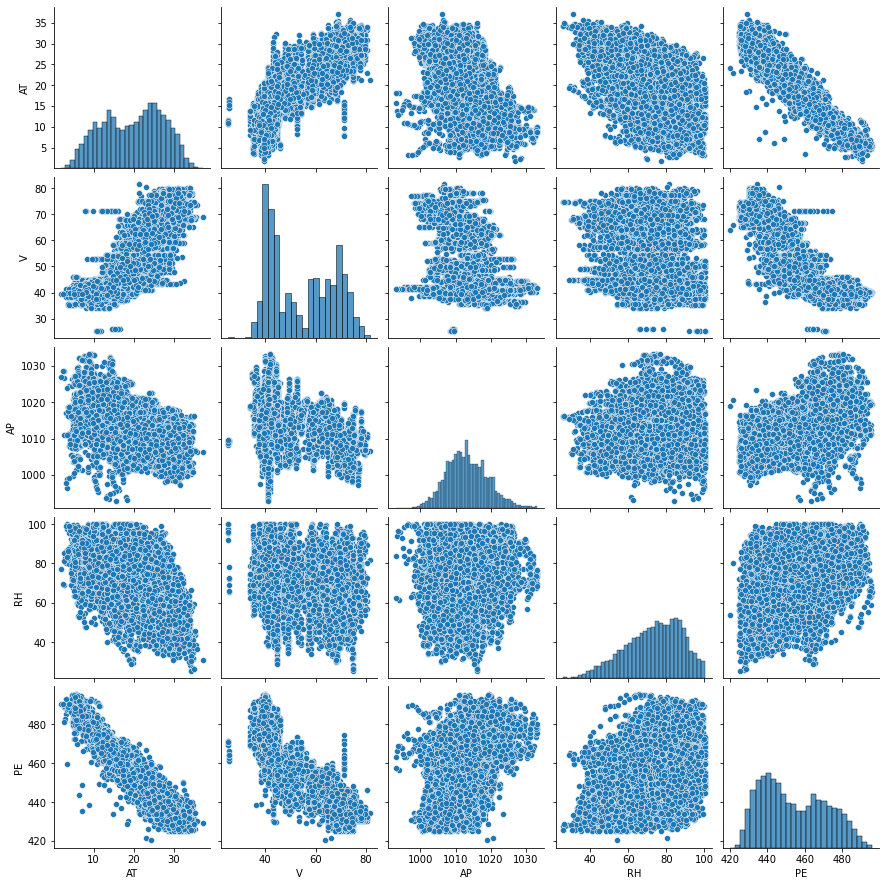

In [53]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(data)

/Users/ajay.pundhir/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


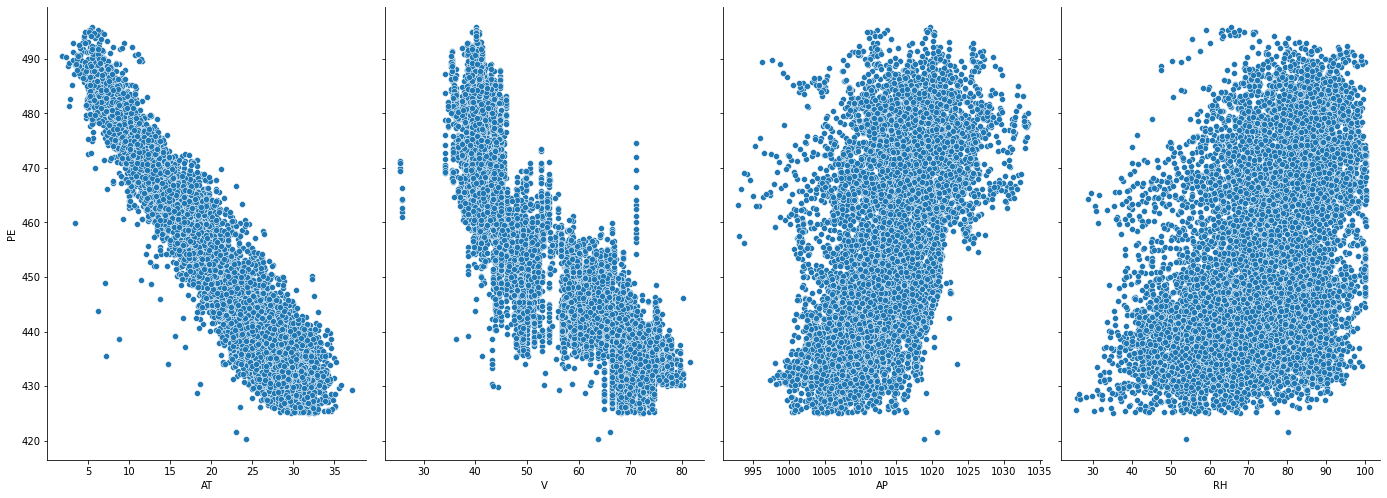

In [54]:
sns.pairplot(data, x_vars=['AT', 'V', 'AP', 'RH'], y_vars='PE',size=7, aspect=0.7, kind='scatter')

In [55]:
# Putting feature variable to X
X = data[['AT', 'V', 'AP', 'RH']]

# Putting response variable to y
y = data['PE']

In [56]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [59]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
# print the intercept
print(lm.intercept_)

460.24992565350016


In [61]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
AT,-1.985763
V,-0.229580
AP,0.056524
RH,-0.158672


In [62]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [64]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.29894757951372
r_square_value : 0.9212053893462191


In [69]:
y_test.shape

(1914,)

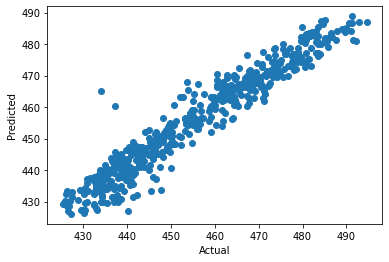

In [70]:
plt.scatter(y_test[:500,],y_pred[:500,]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [71]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 92.12


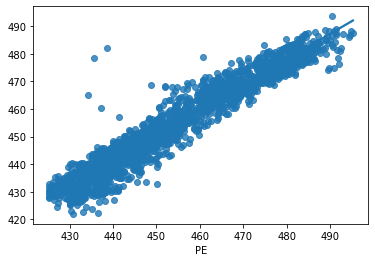

In [74]:
sns.regplot(x=y_test,y=y_pred,ci=None);